In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
import seaborn as sn


# fix random seed for reproducibility
numpy.random.seed(7)

In [41]:
df = pd.read_csv('processed_ticker.csv')
df['date_time'] = pd.to_datetime(df["date time"])
df_idx = df.set_index(["date_time"], drop=True)
df_idx.head(5)

,Unnamed: 0,date,hour,bid,ask,mid,date time
date_time,,,,,,,
2014-01-01 21:00:00,0,01/01/14,21:00:00,2.101175,2.104893,2.102883,01/01/14 21:00
2014-01-01 22:00:00,1,01/01/14,22:00:00,2.103076,2.104591,2.103611,01/01/14 22:00
2014-01-01 23:00:00,2,01/01/14,23:00:00,2.103075,2.104147,2.103738,01/01/14 23:00
2014-02-01 00:00:00,3,02/01/14,00:00:00,2.103690,2.104402,2.103773,02/01/14 00:00
2014-02-01 01:00:00,4,02/01/14,01:00:00,2.103013,2.103856,2.103467,02/01/14 01:00


In [46]:
df_idx = df_idx.sort_index(axis=1, ascending=True)
df_idx = df_idx.iloc[::-1]

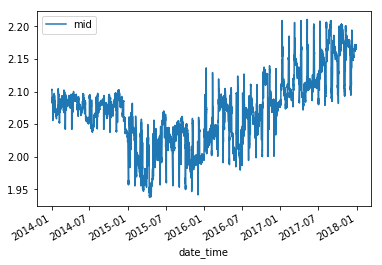

In [53]:
data = df_idx[['mid']]
data.plot(y='mid')

In [70]:
split_date = pd.Timestamp('01/10/2016')

train = data.loc[:split_date]
test = data.loc[split_date:]

ax = train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

KeyError: 1452384000000000000

In [56]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [57]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

c:\users\aishwarya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\aishwarya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
c:\users\aishwarya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
c:\users\aishwarya\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [58]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (16923 x 1)
Test size: (7616 x 1)


In [59]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [60]:

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

c:\users\aishwarya\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\aishwarya\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


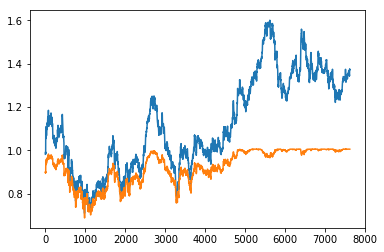

In [61]:

plt.plot(y_test)
plt.plot(y_pred)

In [62]:

from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

R-squared is: -0.283155


In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

In [64]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
16923/16923 [==============================] - 6s 382us/step - loss: 0.0161
Epoch 2/20
16923/16923 [==============================] - 4s 221us/step - loss: 0.0051
Epoch 3/20
16923/16923 [==============================] - 3s 157us/step - loss: 0.0024
Epoch 4/20
16923/16923 [==============================] - 3s 160us/step - loss: 0.0018
Epoch 5/20
16923/16923 [==============================] - 3s 162us/step - loss: 0.0018
Epoch 6/20
16923/16923 [==============================] - 3s 179us/step - loss: 0.0018
Epoch 7/20
16923/16923 [==============================] - 3s 205us/step - loss: 0.0018
Epoch 8/20
16923/16923 [==============================] - 5s 283us/step - loss: 0.0018
Epoch 9/20
16923/16923 [==============================] - 3s 172us/step - loss: 0.0018
Epoch 10/20
16923/16923 [==============================] - 3s 177us/step - loss: 0.0018
Epoch 11/20
16923/16923 [==============================] - 2s 115us/step - loss: 0.0018
Epoch 12/20
16923/16923 [================

R-Squared: -0.668349


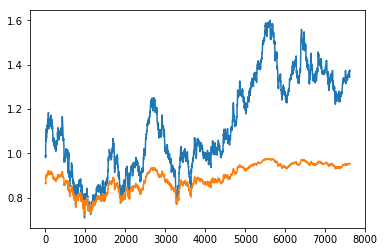

In [65]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [66]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
16923/16923 [==============================] - 6s 327us/step - loss: 9.1029e-04
Epoch 2/20
16923/16923 [==============================] - 3s 172us/step - loss: 5.5622e-05
Epoch 3/20
16923/16923 [==============================] - 2s 134us/step - loss: 6.5841e-05
Epoch 4/20
16923/16923 [==============================] - 2s 141us/step - loss: 7.8920e-05
Epoch 5/20
16923/16923 [==============================] - 2s 122us/step - loss: 7.7222e-05
Epoch 6/20
16923/16923 [==============================] - 2s 113us/step - loss: 8.5059e-05
Epoch 7/20
16923/16923 [==============================] - 2s 109us/step - loss: 7.6499e-05
Epoch 8/20
16923/16923 [==============================] - 2s 120us/step - loss: 8.0229e-05
Epoch 9/20
16923/16923 [==============================] - 2s 102us/step - loss: 7.5334e-05
Epoch 10/20
16923/16923 [==============================] - 2s 106us/step - loss: 7.6273e-05
Epoch 11/20
16923/16923 [==============================] - 2s 111us/step - loss: 7.1522e-

ValueError: Found input variables with inconsistent numbers of samples: [7616, 5064]

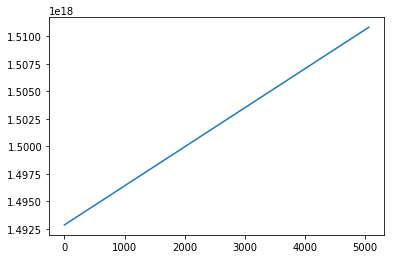

In [75]:
df = pd.read_csv("sample_test_hourly.csv")
df['date_time'] = pd.to_datetime(df["time"])

y_pred = model.predict(df['date_time'])
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)


In [ ]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))